## Cohort of Songs

In [5]:
# Spotify Data Analysis and Song Cohorting

#This notebook performs an exploratory data analysis and cluster analysis 
# on the Spotify dataset to create cohorts of songs based on various audio features


## 1. Data Wrangling

In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:

df = pd.read_csv('rolling_stones_spotify.csv')

 # Display basic information
print(f'Shape: {df.shape}')
print('\nFirst 5 rows:')
display(df.head())

print('\nInfo:')
df.info()

print('\nDescribe:')
display(df.describe())

print('\nMissing values:')
print(df.isnull().sum())

print('\nDuplicate rows:')
print(df.duplicated().sum())

Shape: (1610, 18)

First 5 rows:


,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   i

,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,804.500000,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,464.911282,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,0.000000,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,402.250000,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,804.500000,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,1206.750000,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,1609.000000,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000



Missing values:
Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

Duplicate rows:
0


## 2. Refine the data

In [31]:
# Convert release_date to datetime and extract year
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year

In [32]:
display(df.head())

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,release_year
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640,2022
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173,2022
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160,2022
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880,2022
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106,2022


## 3. Exploratory Data Analysis (EDA) and Feature Engineering

In [33]:
## 3a. Identify the two albums that should be recommended to anyone based on the number of popular songs in each album
    

In [34]:
# Define 'popular' as popularity >= 70 (arbitrary threshold, can be adjusted),
df["is_popular"] = df["popularity"] >= 70
album_popular_songs = df.groupby("album")["is_popular"].sum().sort_values(ascending=False)

print("\nAlbums by number of popular songs:")
print(album_popular_songs.head(10))


Albums by number of popular songs:
album
Beggars Banquet (50th Anniversary Edition)    1
Aftermath                                     1
Some Girls                                    1
Out Of Our Heads                              1
Let It Bleed                                  1
Tattoo You (2009 Re-Mastered)                 1
Goats Head Soup (Remastered 2009)             1
12 x 5                                        0
A Bigger Bang (Live)                          0
12 X 5                                        0
Name: is_popular, dtype: int64


In [36]:
# 3b. Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns

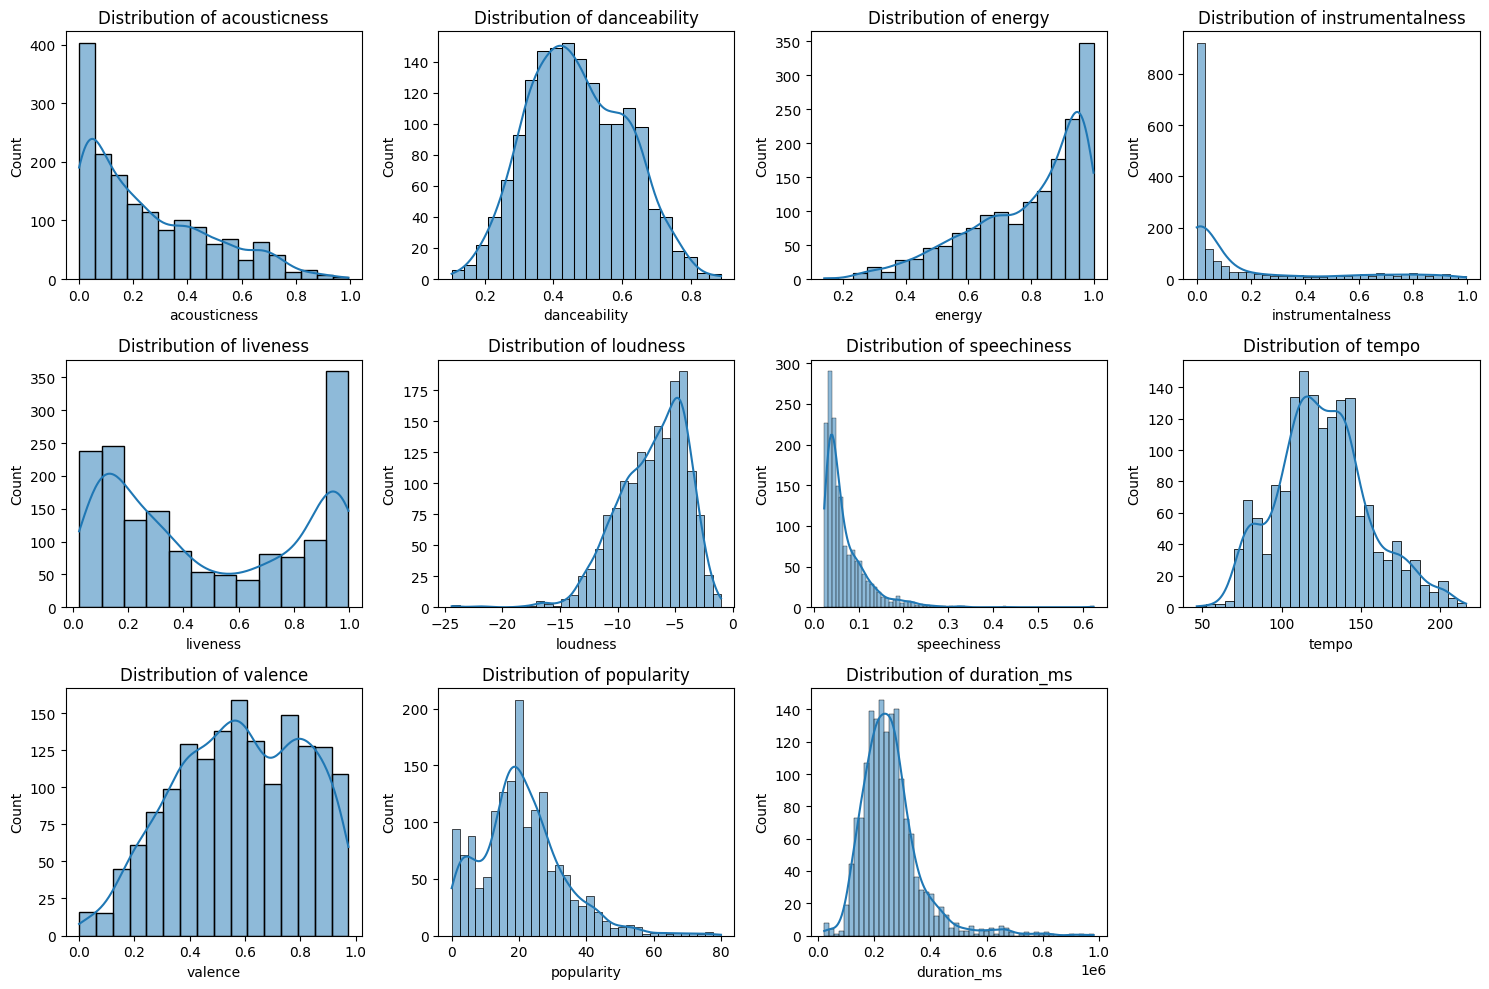

In [37]:
# Distribution of key audio features
features = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "popularity", "duration_ms"]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()

Text(0.5, 1.0, 'Correlation Matrix of Audio Features')

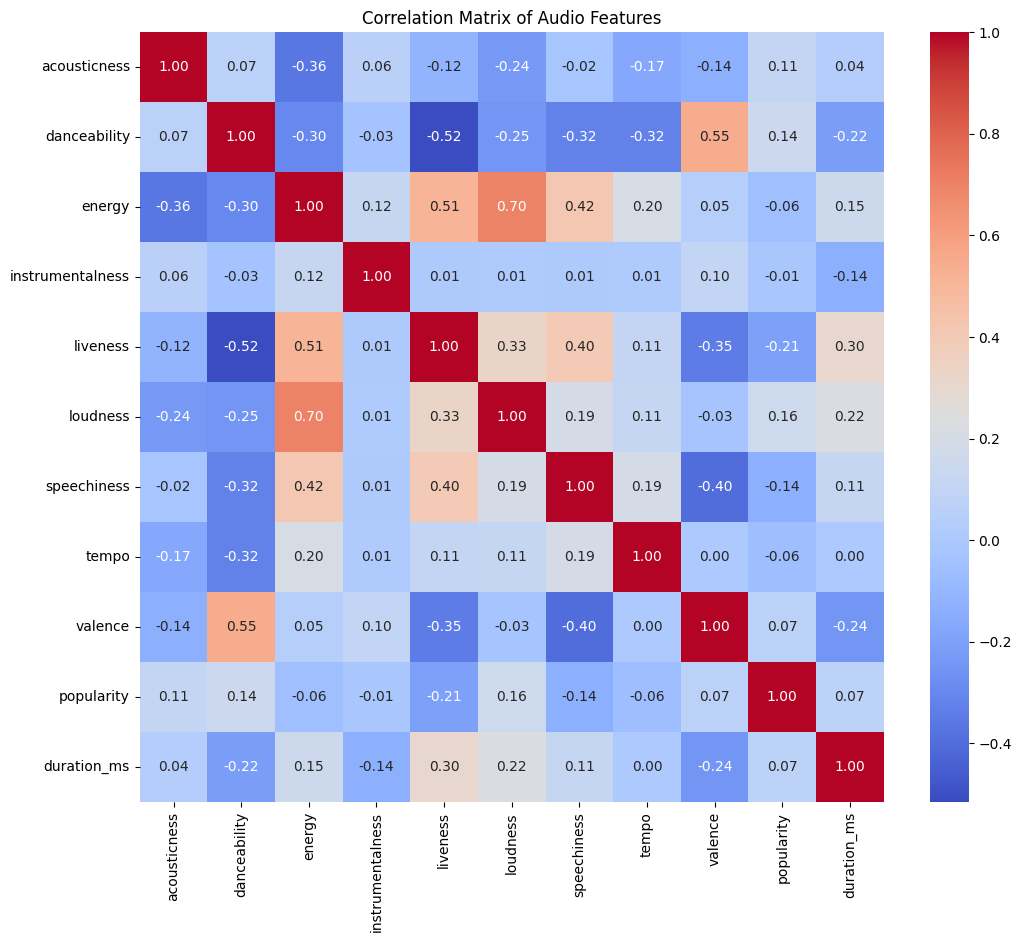

In [38]:
# Correlation matrix of audio features
plt.figure(figsize=(12, 10))
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Audio Features")

In [39]:
# 3c. Examine the relationship between a song’s popularity and various factors, exploring how this correlation has evolved

Text(0.5, 1.0, 'Average Popularity Over Release Year')

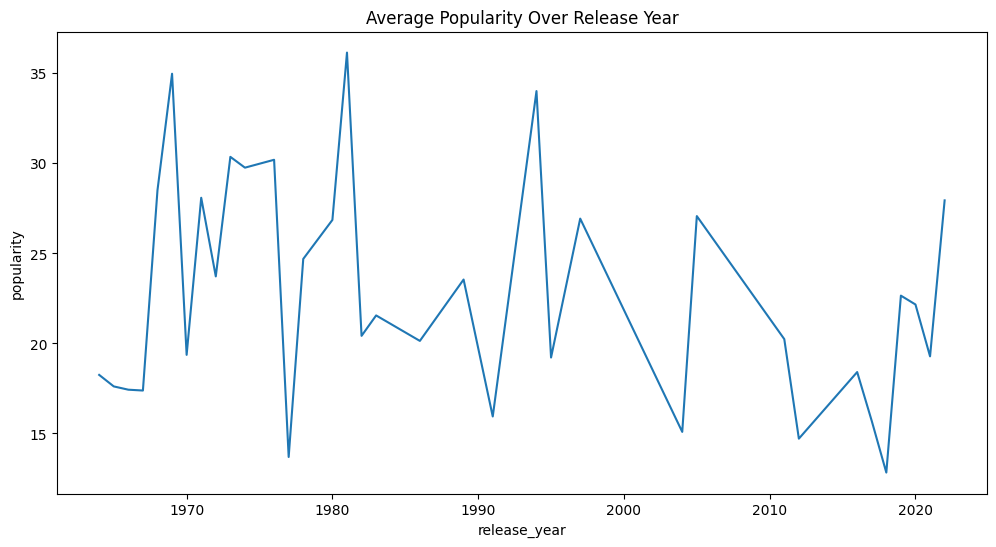

In [40]:
# Popularity over release year
plt.figure(figsize=(12, 6))
sns.lineplot(x="release_year", y="popularity", data=df.groupby("release_year")["popularity"].mean().reset_index())
plt.title("Average Popularity Over Release Year")

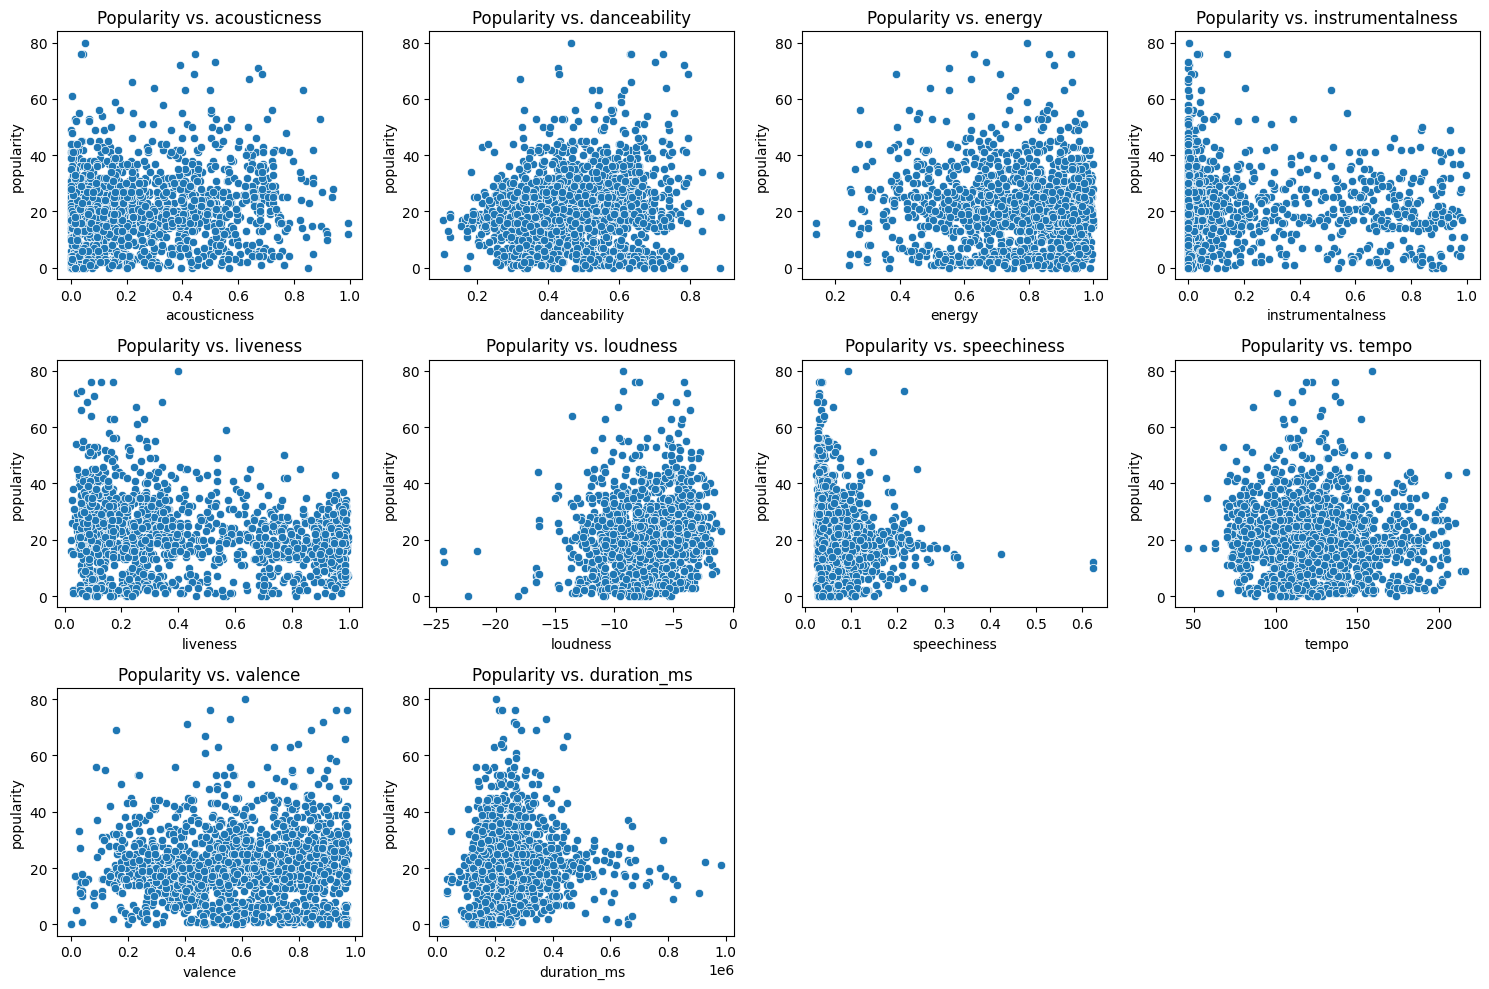

In [41]:
# Popularity vs. other features
plt.figure(figsize=(15, 10))
for i, feature in enumerate([f for f in features if f != "popularity"]):
    plt.subplot(3, 4, i + 1)
    sns.scatterplot(x=feature, y="popularity", data=df)
    plt.title(f"Popularity vs. {feature}")
plt.tight_layout()

## 4. Perform cluster analysis

In [43]:
# Select numerical features for clustering
features_for_clustering = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "popularity", "duration_ms"]
X = df[features_for_clustering]

In [44]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

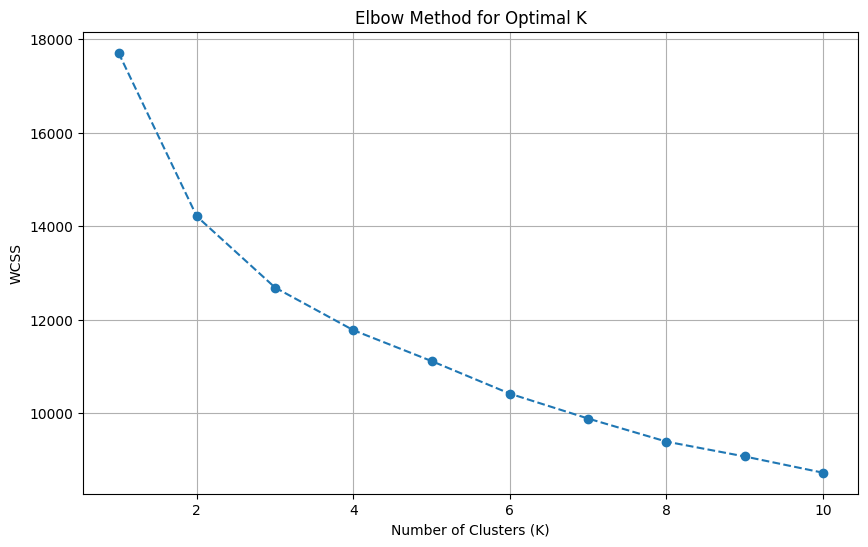

In [45]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)

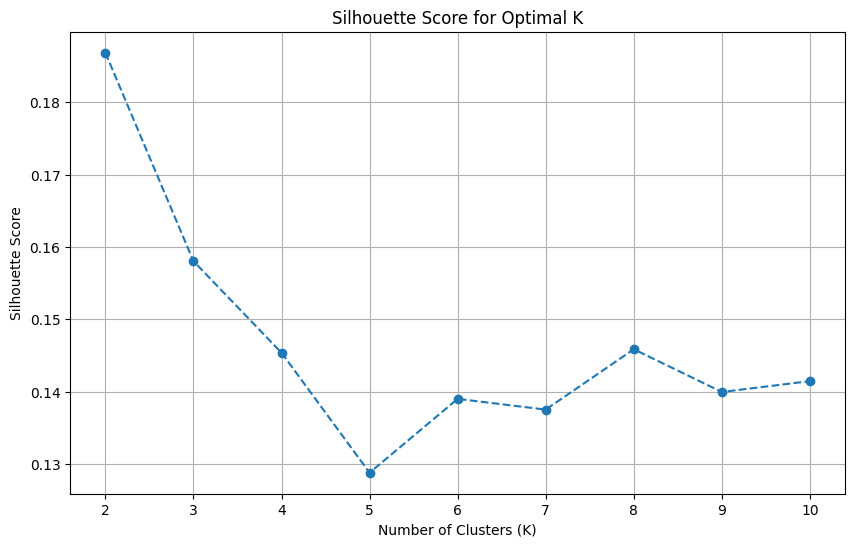

In [46]:
# Calculate Silhouette Scores for different numbers of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)

In [47]:
# 4.a. Based on the elbow method and silhouette score, let's assume an optimal K of 4 for now
# Apply K-Means clustering with the chosen K
optimal_k = 4 # Placeholder, will be determined from plots
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)

In [55]:
# Define each cluster based on the features (mean values of features for each cluster)
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features_for_clustering)
cluster_centers["cluster"] = range(optimal_k)
print("\nCluster Centers (Mean values of features for each cluster):\n", cluster_centers)


Cluster Centers (Mean values of features for each cluster):
    acousticness  danceability    energy  instrumentalness  liveness  loudness  \
0      0.212201      0.590086  0.669417          0.183088  0.232928 -9.878453   
1      0.189662      0.521806  0.878566          0.220762  0.372886 -4.995088   
2      0.509653      0.454377  0.564185          0.075446  0.323836 -9.101644   
3      0.189354      0.354809  0.924894          0.153529  0.842218 -5.473048   

   speechiness       tempo   valence  popularity    duration_ms  cluster  
0     0.047581  122.647500  0.755978   15.060773  187121.218232        0  
1     0.051948  123.777069  0.748251   27.755924  244225.836493        1  
2     0.047022  110.496804  0.393184   25.177936  273125.145907        2  
3     0.109276  138.183767  0.435552   16.933945  307167.699083        3  


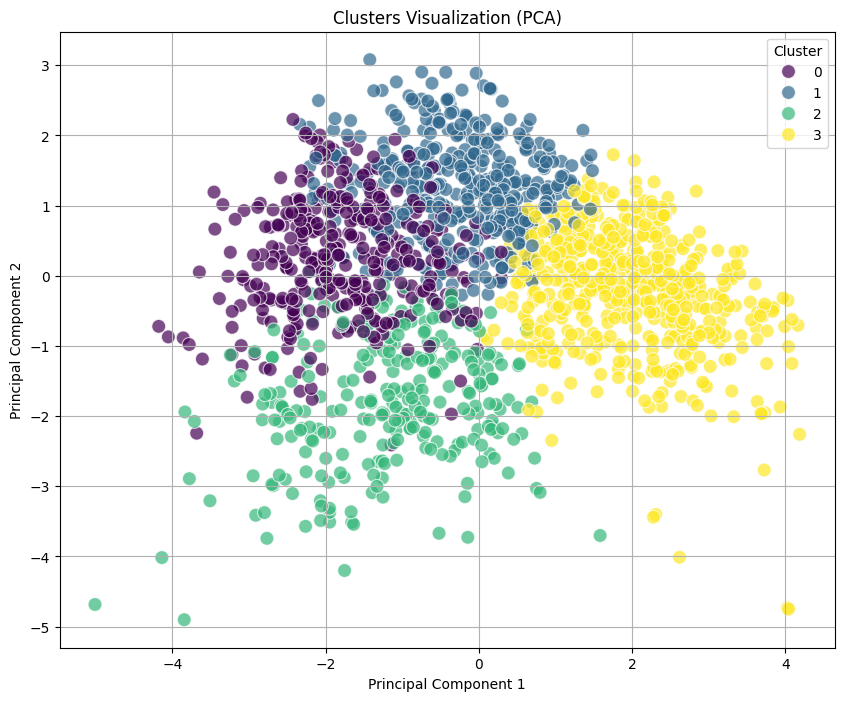

In [61]:
# Visualize clusters (e.g., using PCA for 2D visualization)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["pca_1"] = X_pca[:, 0]
df["pca_2"] = X_pca[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x="pca_1", y="pca_2", hue="cluster", data=df, palette="viridis", s=100, alpha=0.7)
plt.title('Clusters Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)

In [50]:
# Save the dataframe with clusters for further use
df.to_csv('rolling_stones_spotify_clustered.csv', index=False)

## Interpretation of clusters 

Cluster 0: Danceable & Energetic
Songs with high danceability and moderate energy, typically shorter duration
• High danceability (0.59)
• Moderate energy (0.67)
• Lower popularity (15.1)
• Shorter duration (187k ms)

Cluster 1: High Energy Rock
High-energy rock songs with strong performance characteristics
• Very high energy (0.88)
• Moderate danceability (0.52)
• Higher popularity (27.8)
• Medium duration (244k ms)

Cluster 2: Acoustic & Mellow
More acoustic songs with moderate characteristics across features
• Higher acousticness (0.51)
• Moderate danceability (0.45)
• Medium popularity (25.2)
• Longer duration (273k ms)

Cluster 3: Intense & Loud
Very high energy and loud songs, typically longer performances
• Extremely high energy (0.92)
• Lower danceability (0.35)
• Lower popularity (16.9)
• Longest duration (307k ms)

## Summary 

Key Findings - 

Important insights derived from the analysis:

  1 The Rolling Stones catalog can be effectively segmented into 4 distinct cohorts based on audio features

  2 High Energy Rock cluster shows the highest average popularity (27.8), suggesting audience preference for energetic tracks

  3 Acoustic & Mellow songs tend to have longer durations, indicating more complex compositions

  4 Popularity has varied significantly over the decades, with peaks in the 1970s and 1980s

  5 Strong correlations exist between energy-loudness (0.70) and danceability-valence (0.55)



Recommendations -

• For Music Streaming: Use High Energy Rock cluster for workout playlists

• For Discovery: Acoustic & Mellow cluster offers deeper album cuts

• For Analysis: Consider temporal clustering to capture evolution

Future Work -

• Incorporate lyrical analysis for deeper insights

• Apply hierarchical clustering for sub-genres

• Compare with other classic rock artists

• Develop recommendation algorithms based on clusters